<a href="https://colab.research.google.com/github/Ujoshna/OIBSIP/blob/main/oibsip-task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** **Fraud Detection** **

Step 1: Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/creditcard.csv')

# Display the first few rows of the dataset
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Step 2: Exploratory Data Analysis (EDA)

In [4]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values in the target variable 'Class'
data = data.dropna(subset=['Class'])

# Fill missing values in the feature columns with the median value of the respective columns
for column in data.columns:
    if data[column].isnull().any():
        median = data[column].median()
        data[column] = data[column].fillna(median)

# Verify there are no missing values
print(data.isnull().sum())


Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     2
dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Step 3: Data Preprocessing

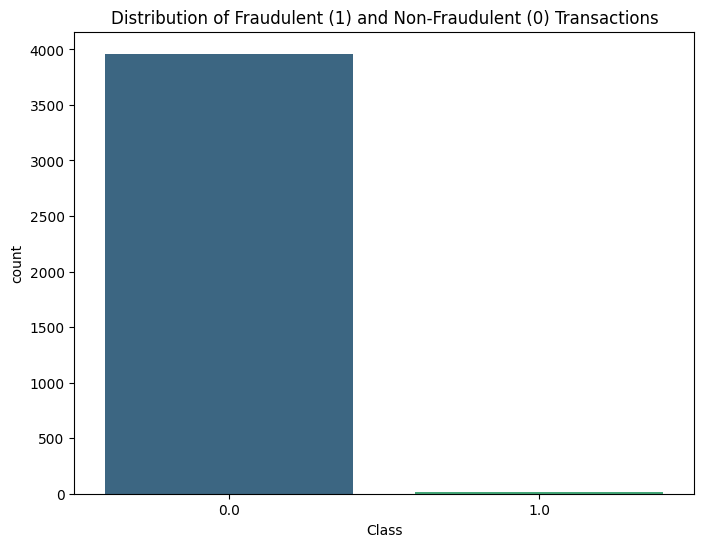

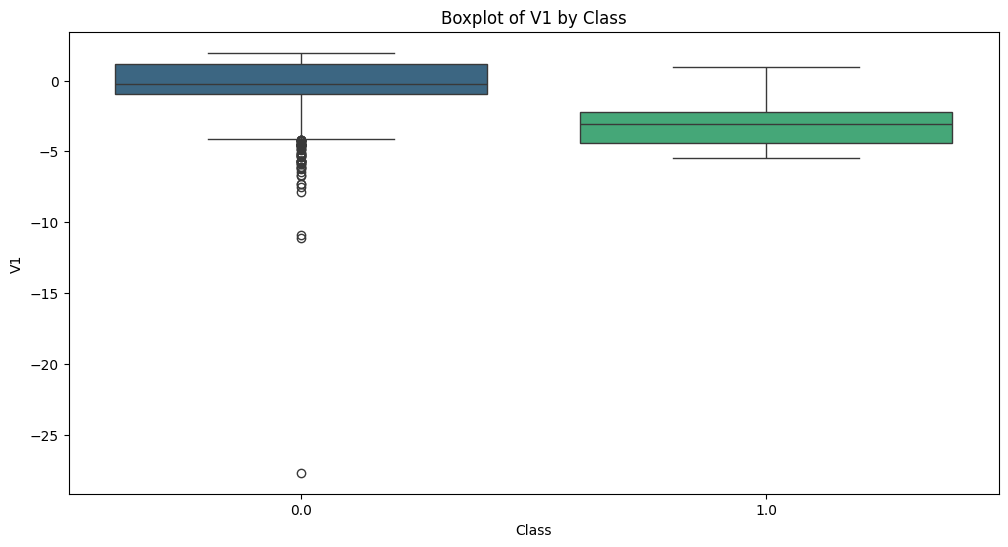

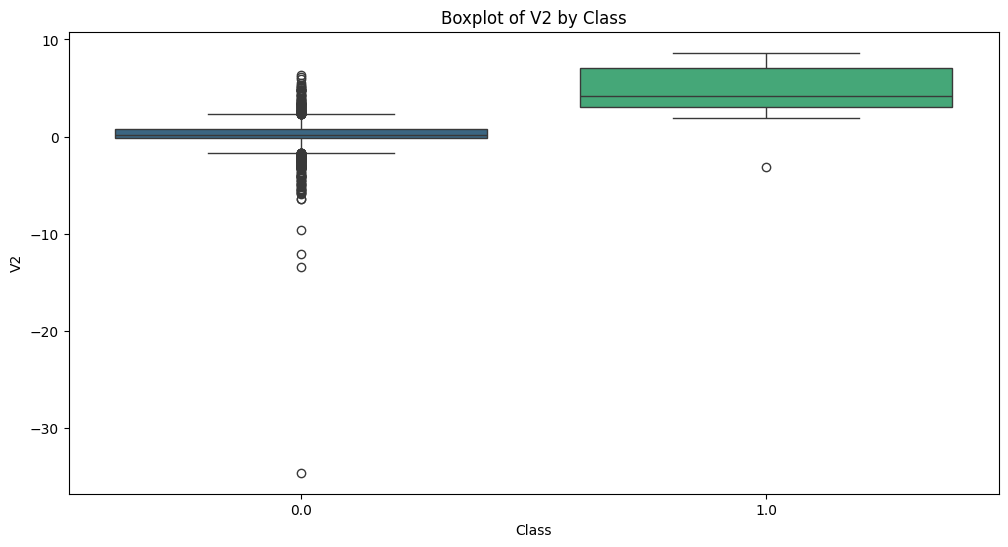

<Figure size 2000x5500 with 0 Axes>

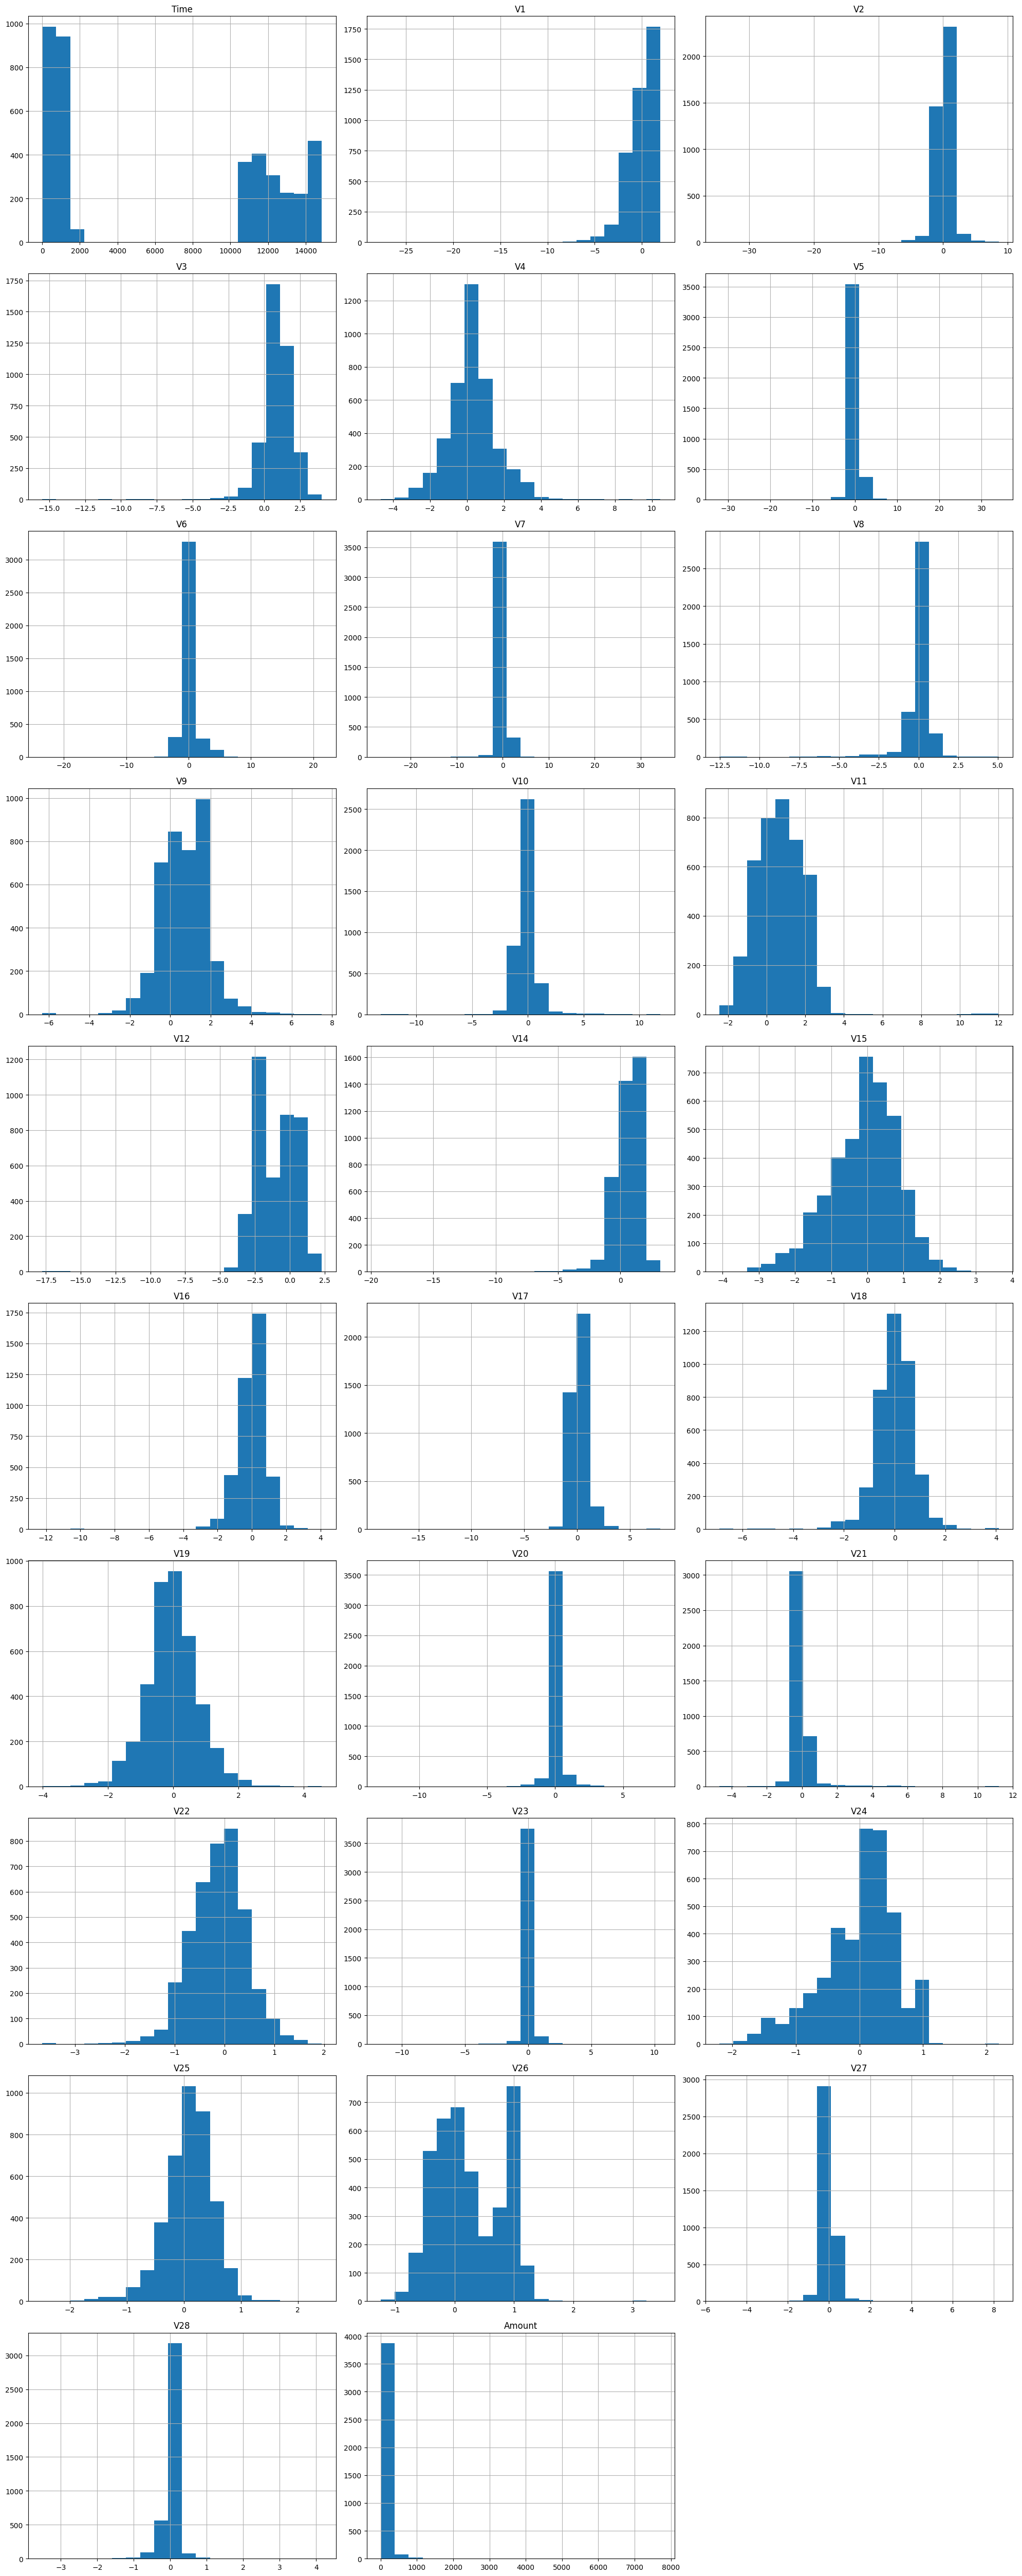

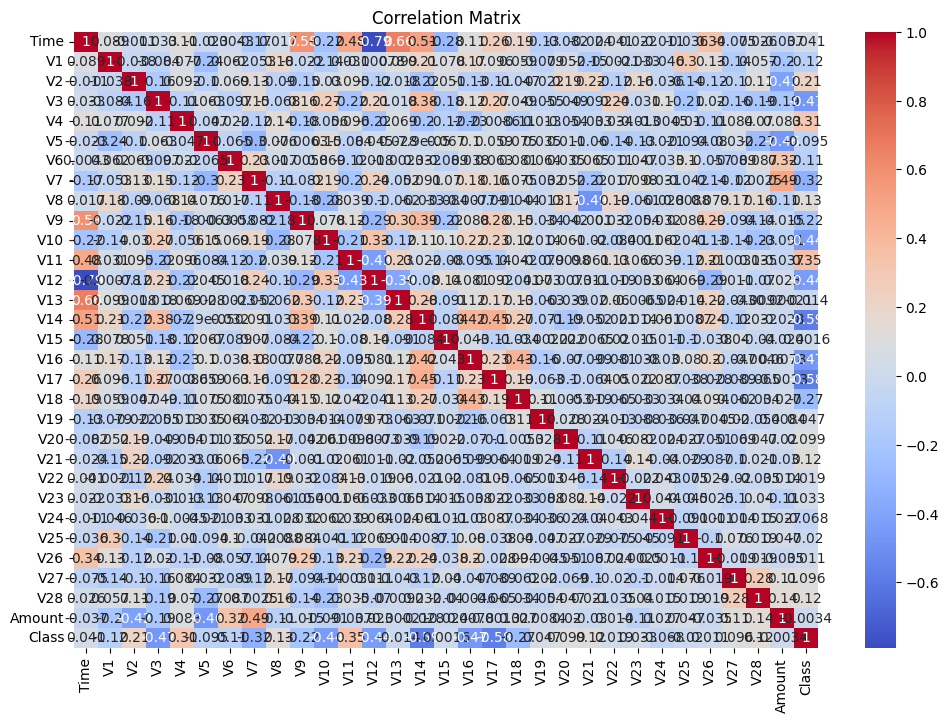

In [6]:
# Visualize the distribution of the 'Class' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data, palette='viridis', hue='Class', dodge=False)
plt.legend([], [], frameon=False)
plt.title('Distribution of Fraudulent (1) and Non-Fraudulent (0) Transactions')
plt.show()

# Box plots for different features grouped by Class
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='V1', data=data, hue='Class', dodge=False, palette='viridis')
plt.legend([], [], frameon=False)
plt.title('Boxplot of V1 by Class')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='V2', data=data, hue='Class', dodge=False, palette='viridis')
plt.legend([], [], frameon=False)
plt.title('Boxplot of V2 by Class')
plt.show()

# Histograms for different features
num_features = data.shape[1] - 1  # Excluding the target variable
rows = (num_features // 3) + 1
plt.figure(figsize=(20, 5 * rows))
data.drop('Class', axis=1).hist(bins=20, figsize=(20, 5 * rows), layout=(rows, 3))
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Step 4: Data Preprocessing

In [7]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, X_test.shape)

(3180, 30) (796, 30)


Step 5: Feature Engineering

In [8]:
# Standardize the features (important for models like Logistic Regression and Neural Networks)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step 6: Model Training and Evaluation


Logistic Regression:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       793
         1.0       0.75      1.00      0.86         3

    accuracy                           1.00       796
   macro avg       0.88      1.00      0.93       796
weighted avg       1.00      1.00      1.00       796

Accuracy: 0.9987437185929648
ROC AUC Score: 0.9993694829760403
Precision: 0.75
Recall: 1.0
F1 Score: 0.8571428571428571
Matthews Correlation Coefficient: 0.8654791877706018

Decision Tree:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       793
         1.0       0.75      1.00      0.86         3

    accuracy                           1.00       796
   macro avg       0.88      1.00      0.93       796
weighted avg       1.00      1.00      1.00       796

Accuracy: 0.9987437185929648
ROC AUC Score: 0.9993694829760403
Precision: 0.75
Recall: 1.0
F1 Score: 0.8571428571428571
Matthews Correl

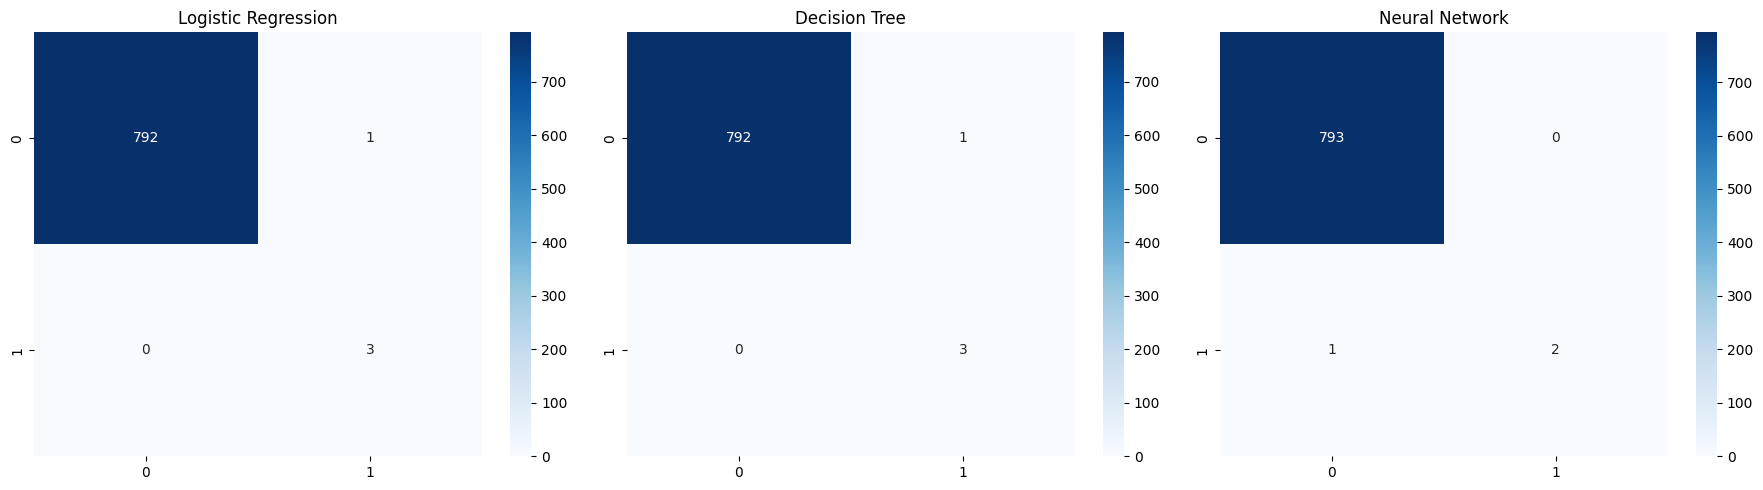

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef

# Initialize the models
lr_model = LogisticRegression(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
nn_model = MLPClassifier(random_state=42)

# Train the models
lr_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train, y_train)
nn_model.fit(X_train_scaled, y_train)

# Make predictions
lr_preds = lr_model.predict(X_test_scaled)
dt_preds = dt_model.predict(X_test)
nn_preds = nn_model.predict(X_test_scaled)

# Evaluate the models
models = {
    "Logistic Regression": lr_preds,
    "Decision Tree": dt_preds,
    "Neural Network": nn_preds
}

for model_name, preds in models.items():
    print(f"\n{model_name}:")
    print(classification_report(y_test, preds))
    print("Accuracy:", accuracy_score(y_test, preds))
    print("ROC AUC Score:", roc_auc_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds))
    print("Recall:", recall_score(y_test, preds))
    print("F1 Score:", f1_score(y_test, preds))
    print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, preds))

# Confusion matrices with Seaborn heatmap
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_test, lr_preds), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression')

plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix(y_test, dt_preds), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree')

plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix(y_test, nn_preds), annot=True, fmt='d', cmap='Blues')
plt.title('Neural Network')

plt.tight_layout()
plt.show()